# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.100572e+01     7.033343e+00
 * time: 0.004194974899291992
     1     2.952502e+01     5.296453e+00
 * time: 0.012537956237792969
     2     2.235114e+01     8.509366e+00
 * time: 0.03272390365600586
     3     1.383626e+01     2.219555e+00
 * time: 0.05514693260192871
     4     1.305291e+01     3.274194e+00
 * time: 0.0698390007019043
     5     1.233834e+01     3.156024e+00
 * time: 0.08462190628051758
     6     1.000354e+01     1.437480e+00
 * time: 0.09877490997314453
     7     9.414986e+00     1.230567e+00
 * time: 0.11325192451477051
     8     9.201279e+00     1.188026e+00
 * time: 0.12795090675354004
     9     9.104359e+00     1.277059e+00
 * time: 0.1393260955810547
    10     8.887866e+00     1.403797e+00
 * time: 0.1501319408416748
    11     8.761447e+00     7.460308e-01
 * time: 0.1612250804901123
    12     8.666705e+00     6.545796e-01
 * time: 0.17232990264892578
    13     8.605540e+00     3.139255e-01
 * time: 0

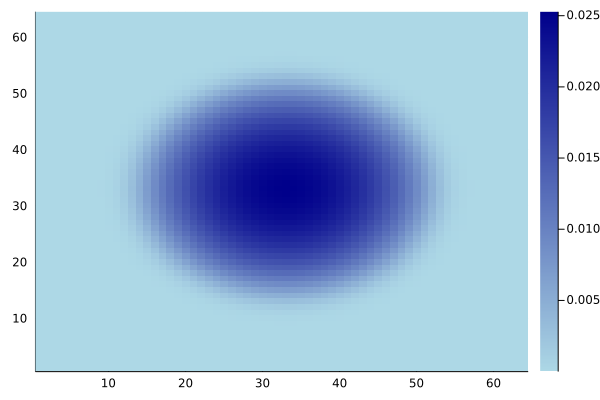

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)